# Challenge - Air pollution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('./Train/Train.csv').values
X=data[:,:5]
Y=data[:,5]
print(X.shape)
print(Y.shape)

(1600, 5)
(1600,)


In [3]:
df1=pd.DataFrame(X)
df2=pd.DataFrame(Y)
df1.head()

,0,1,2,3,4
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [4]:
df2.head()

,0
0,-82.154667
1,-48.897960
2,77.270371
3,-2.988581
4,-37.596722


In [5]:
# normalization of X data
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-u)/std

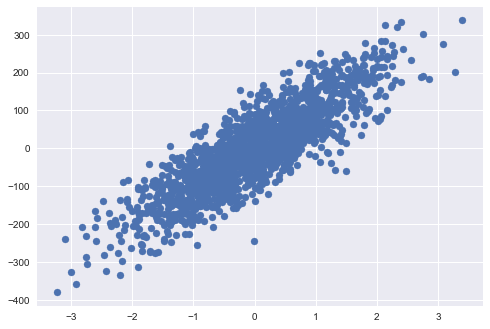

In [6]:
plt.style.use('seaborn')
x1=X[:,1]
plt.scatter(x1,Y)

# linear regression model

In [28]:
ones=np.ones((X.shape[0],1))
X_=np.hstack((X,ones))
print(X_)

[[ 0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448  1.        ]
 [-0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038  1.        ]
 [ 0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187  1.        ]
 ...
 [ 1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223  1.        ]
 [-1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908  1.        ]
 [-1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738  1.        ]]


In [29]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e=0.0
    y_=hypothesis(X,theta)
    m=X.shape[0]
    e=np.sum((y-y_)**2)
    return e/m
def gradient(X,y,theta):
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    return grad/m

def gradientDescent(X,y,learning_rate=0.1,epochs=1000):
    n=X.shape[1]
    theta=np.zeros((n,))
    
    error_list=[]
    
    for i in range(epochs):
        e=error(X,y,theta)
        error_list.append(e)
        
        # update rule
        grad=gradient(X,y,theta)
        
        theta=theta-learning_rate*grad
            
            
    return theta,error_list

    

In [30]:
theta,errorlist=gradientDescent(X_,Y)

In [31]:
print(errorlist)

[12256.130414032896, 10026.033684143073, 8217.055252817618, 6749.466627013954, 5558.673187089289, 4592.334067473994, 3808.0315657917154, 3171.3849608951396, 2654.523779945838, 2234.85183834815, 1894.04653113265, 1617.2484830009766, 1392.4052530232816, 1209.7397313936942, 1061.3194764678283, 940.707776235508, 842.6808858642628, 762.9988586786474, 698.219786534378, 645.549205733345, 602.7179942368201, 567.8833559297998, 539.5485154072414, 516.497578530278, 497.74268728982713, 482.48114259194176, 470.06060992121996, 459.9508802381249, 451.72094792963367, 445.0204021068504, 439.5643175010903, 435.12098512481214, 431.50194759201077, 428.5539050830669, 426.15213988278555, 424.1951738531029, 422.60042706729115, 421.3006895139444, 420.2412532069084, 419.3775807751255, 418.67340992065016, 418.0992120500355, 417.6309387353912, 417.24900212055684, 416.9374455012189, 416.68326851820393, 416.475878069587, 416.30664146076725, 416.16852270834255, 416.0557864849475, 415.96375709353555, 415.88862221690

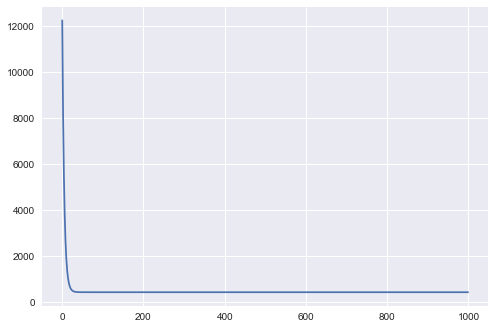

In [32]:
plt.plot(errorlist)

In [44]:
Y_=hypothesis(X_,theta)
print(Y_)

[ -57.87196311  -89.46019557   53.95305942 ... -115.65802541  -64.27649688
 -116.11442895]


In [46]:
print(Y)

[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [47]:
def r2s(y,y_):
    
    num= np.sum((y-y_)**2)
    den= np.sum((y-y.mean())**2)
    
    score=1-num/den
    
    return score*100


In [48]:
r2s(Y,Y_)

96.60939669975616

In [64]:
x_test=pd.read_csv('./Test/Test.csv').values

In [66]:
ones=np.ones((x_test.shape[0],1))
X_test=np.hstack((x_test,ones))

In [68]:
y_test=hypothesis(X_test,theta)

In [75]:
column=['target']

In [80]:
df=pd.DataFrame(data=y_test,columns=column)
df=df.rename_axis('Id')
df.to_csv("submission.csv")

Object `MultiOutputRegressor` not found.
